# CCLAMP Network: Community detection

In [1]:
# Import packages
import pandas as pd
import networkx as nx
import numpy as np
from pyvis.network import Network
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

In [2]:
# Read the network
network = pd.read_csv("CCLAMP_Directed_Network.txt", sep="\t", encoding='utf-8')
network.head(10)

,Target,Source,Weight,Target_DOB,Source_DOB
0,Hendrik Andriessen,Albert Helman,3,17 september 1892,7 november 1903
1,Henri Bruning,Henk Kuitenbrouwer,12,10 juli 1900,20 november 1903
2,Henri Bruning,Jan Bruna,3,10 juli 1900,17 augustus 1876
3,Joep Nicolas,Henk Kuitenbrouwer,3,6 oktober 1897,20 november 1903
4,Joep Nicolas,Jan Bruna,2,6 oktober 1897,17 augustus 1876
5,Albert Kuyle,Henk Kuitenbrouwer,37,17 februari 1904,20 november 1903
6,Albert Kuyle,Jan Bruna,3,17 februari 1904,17 augustus 1876
7,Albe,Henk Kuitenbrouwer,25,8 juni 1902,20 november 1903
8,Albe,Jan Bruna,2,8 juni 1902,17 augustus 1876
9,Carel Scharten,Jan Engelman,2,14 maart 1878,7 juni 1900


In [3]:
# Create a weighted graph
G = nx.from_pandas_edgelist(network, 
                            source = 'Source', 
                            target = 'Target', 
                            edge_attr = 'Weight',
                            create_using = nx.DiGraph())
print(G)

DiGraph with 7477 nodes and 158330 edges


In [4]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)
      
# setting up node attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('CCLAMP.html')

CCLAMP.html


# Detect communities

In [4]:
G_undirected = G.to_undirected()
communities = community_louvain.best_partition(G_undirected)
communities

{'Albert Helman': 0,
 'Hendrik Andriessen': 0,
 'Henk Kuitenbrouwer': 0,
 'Henri Bruning': 0,
 'Jan Bruna': 0,
 'Joep Nicolas': 38,
 'Albert Kuyle': 0,
 'Albe': 2,
 'Jan Engelman': 0,
 'Carel Scharten': 0,
 'Willem Maas': 0,
 'Frans Coenen': 0,
 'Herman Robbers': 0,
 'Roel Houwink': 0,
 'Dirk Coster': 0,
 'F. Bordewijk': 0,
 'Albert Plasschaert': 38,
 'Erich Wichman': 0,
 'L.J.M. Feber': 38,
 'Willem Pijper': 10,
 'Frederik van Eeden': 0,
 'M. Bruna': 0,
 'Karel van den Oever': 38,
 'Just Havelaar': 0,
 'Gerard Bruning': 0,
 'Gerard Brom': 0,
 'Frans Erens': 0,
 'H. Marsman': 0,
 'Herman Menagé Challa': 0,
 'C.J. Kelk': 0,
 'H.W.J.M. Keuls': 0,
 'P.C. Boutens': 0,
 'Bernard Verhoeven': 38,
 'Multatuli': 0,
 'Albert Verwey': 0,
 'Marcellus Emants': 0,
 'Hélène Swarth': 0,
 'Herman Gorter': 0,
 'Wouter Hutschenruyter': 0,
 'J.A. Lambert-van der Kolf': 0,
 'Marie Koenen': 38,
 'Marie Gijsen': 0,
 'Ed. Hoornik': 10,
 'Rie Cramer': 0,
 'Johan de Meester': 0,
 'Pieter van der Meer de Walcher

In [5]:
communities_df = pd.DataFrame.from_dict(communities, orient='index')
communities_df = communities_df.rename_axis('Author').reset_index()
communities_df.columns = ['Author', 'Community']

communities_df.head(10)

,Author,Community
0,Albert Helman,0
1,Hendrik Andriessen,0
2,Henk Kuitenbrouwer,0
3,Henri Bruning,0
4,Jan Bruna,0
5,Joep Nicolas,38
6,Albert Kuyle,0
7,Albe,2
8,Jan Engelman,0
9,Carel Scharten,0


In [6]:
# save communities
communities_df.to_csv("CCLAMP_Network_Communities.txt", index=False, sep='\t', encoding='utf-8')

# Create list of authors and their DOB, DOD, POB and POD

In [7]:
# Read metadata file with the authors
metadata_df = pd.read_csv("C-CLAMP_metadata_gender.txt", sep="\t", encoding='utf-8')

In [8]:
# make list of all authors and DOB

# Select Author and DOB
metadata = metadata_df[['Author', 'DOB']]

# Flatten the dataframe
flattened_data = []

for index, row in metadata.iterrows():
    authors = str(row['Author']).split('; ')
    dobs = str(row['DOB']).split('; ')
    
    for author, dob in zip(authors, dobs):
        flattened_data.append({'Author': author, 'DOB': dob})

flattened_df = pd.DataFrame(flattened_data)

# Replace 'NA' or 'nan' with NaN
flattened_df.replace(['NA', 'nan'], np.nan, inplace=True)

# Remove duplicate rows
authors_dob_df = flattened_df.drop_duplicates()

# Remove duplicate authors where the dob is nan
# Loop over the DataFrame
for author in authors_dob_df['Author'].unique():
    author_entries = authors_dob_df[authors_dob_df['Author'] == author]
    
    # Check if there are multiple entries for the author
    if len(author_entries) > 1:
        # Keep the entry where DOB is not NaN
        filtered_entry = author_entries.dropna(subset=['DOB']).iloc[0]
        
        # Drop other entries for the same author
        authors_dob_df = authors_dob_df.drop(authors_dob_df[authors_dob_df['Author'] == author].index)
        
        # Append the filtered entry back to the DataFrame
        authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)
        
# Display the flattened dataframe
authors_dob_df.head(20)

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\548935938.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dob_df = authors_dob_df.append(filtered_entry, ignore_index=True)


,Author,DOB
0,NaN,NaN
1,Jan Engelman,7 juni 1900
2,Willem Maas,28 april 1897
3,Joep Nicolas,6 oktober 1897
4,Albert Helman,7 november 1903
5,Willem Nieuwenhuis,1886
6,Karel van den Oever,19 november 1879
7,Wies Moens,28 januari 1898
8,Eduard A. Serrarens,27 december 1895
9,Henk Kuitenbrouwer,20 november 1903


In [9]:
# save DOB list
authors_dob_df.to_csv("author_DOB_list.txt", index=False, sep='\t', encoding='utf-8')

In [10]:
# make list of all authors and POB

# Select Author and POB
metadata = metadata_df[['Author', 'POB']]

# Flatten the dataframe
flattened_data = []

for index, row in metadata.iterrows():
    authors = str(row['Author']).split('; ')
    pobs = str(row['POB']).split('; ')
    
    for author, pob in zip(authors, pobs):
        flattened_data.append({'Author': author, 'POB': pob})

flattened_df = pd.DataFrame(flattened_data)

# Replace 'NA' or 'nan' with NaN
flattened_df.replace(['NA', 'nan'], np.nan, inplace=True)

# Remove duplicate rows
authors_pob_df = flattened_df.drop_duplicates()

# Remove duplicate authors where the pob is nan
# Loop over the DataFrame
for author in authors_pob_df['Author'].unique():
    author_entries = authors_pob_df[authors_pob_df['Author'] == author]
    
    # Check if there are multiple entries for the author
    if len(author_entries) > 1:
        # Keep the entry where POB is not NaN
        filtered_entry = author_entries.dropna(subset=['POB']).iloc[0]
        
        # Drop other entries for the same author
        authors_pob_df = authors_pob_df.drop(authors_pob_df[authors_pob_df['Author'] == author].index)
        
        # Append the filtered entry back to the DataFrame
        authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
        
# Display the flattened dataframe
authors_pob_df.head(20)

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pob_df = authors_pob_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3313332636.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

,Author,POB
0,NaN,NaN
1,Willem Maas,Utrecht
2,Joep Nicolas,NaN
3,Willem Nieuwenhuis,NaN
4,Karel van den Oever,Antwerpen
5,Wies Moens,Sint-Gillis-Bij-Dendermonde
6,Eduard A. Serrarens,Maastricht
7,L.J.M. Feber,Bergen op Zoom
8,G.P.M. Knuvelder,Arnhem
9,Jan Bruna,NaN


In [11]:
# save POB list
authors_pob_df.to_csv("author_POB_list.txt", index=False, sep='\t', encoding='utf-8')

In [12]:
# make list of all authors and their POD

# Select Author and POD
metadata = metadata_df[['Author', 'POD']]

# Flatten the dataframe
flattened_data = []

for index, row in metadata.iterrows():
    authors = str(row['Author']).split('; ')
    pods = str(row['POD']).split('; ')
    
    for author, pod in zip(authors, pods):
        flattened_data.append({'Author': author, 'POD': pod})

flattened_df = pd.DataFrame(flattened_data)

# Replace 'NA' or 'nan' with NaN
flattened_df.replace(['NA', 'nan'], np.nan, inplace=True)

# Remove duplicate rows
authors_pod_df = flattened_df.drop_duplicates()

# Remove duplicate authors where the pod is nan
# Loop over the DataFrame
for author in authors_pod_df['Author'].unique():
    author_entries = authors_pod_df[authors_pod_df['Author'] == author]
    
    # Check if there are multiple entries for the author
    if len(author_entries) > 1:
        # Keep the entry where pod is not NaN
        filtered_entry = author_entries.dropna(subset=['POD']).iloc[0]
        
        # Drop other entries for the same author
        authors_pod_df = authors_pod_df.drop(authors_pod_df[authors_pod_df['Author'] == author].index)
        
        # Append the filtered entry back to the DataFrame
        authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)

# Display the flattened dataframe
authors_pod_df.head(20)

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_pod_df = authors_pod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\2728974229.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

,Author,POD
0,NaN,NaN
1,Willem Maas,Utrecht
2,Willem Nieuwenhuis,NaN
3,Karel van den Oever,Antwerpen
4,Wies Moens,Geleen
5,Eduard A. Serrarens,Roermond
6,L.J.M. Feber,Den Haag
7,G.P.M. Knuvelder,Eindhoven
8,Jan Bruna,NaN
9,Bernard Verhoeven,Arnhem


In [13]:
# save POD list
authors_pod_df.to_csv("author_POD_list.txt", index=False, sep='\t', encoding='utf-8')

In [14]:
# make list of all authors and DOD

# Select Author and DOD
metadata = metadata_df[['Author', 'DOD']]

# Flatten the dataframe
flattened_data = []

for index, row in metadata.iterrows():
    authors = str(row['Author']).split('; ')
    dods = str(row['DOD']).split('; ')
    
    for author, dod in zip(authors, dods):
        flattened_data.append({'Author': author, 'DOD': dod})

flattened_df = pd.DataFrame(flattened_data)

# Replace 'NA' or 'nan' with NaN
flattened_df.replace(['NA', 'nan'], np.nan, inplace=True)

# Remove duplicate rows
authors_dod_df = flattened_df.drop_duplicates()

# Remove duplicate authors where the dod is nan
# Loop over the DataFrame
for author in authors_dod_df['Author'].unique():
    author_entries = authors_dod_df[authors_dod_df['Author'] == author]
    
    # Check if there are multiple entries for the author
    if len(author_entries) > 1:
        # Keep the entry where DOD is not NaN
        filtered_entry = author_entries.dropna(subset=['DOD']).iloc[0]
        
        # Drop other entries for the same author
        authors_dod_df = authors_dod_df.drop(authors_dod_df[authors_dod_df['Author'] == author].index)
        
        # Append the filtered entry back to the DataFrame
        authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
        
# Display the flattened dataframe
authors_dod_df.head(20)


C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  authors_dod_df = authors_dod_df.append(filtered_entry, ignore_index=True)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_4992\3036065502.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

,Author,DOD
0,NaN,NaN
1,Jan Engelman,20 maart 1972
2,Willem Maas,6 mei 1950
3,Joep Nicolas,25 juli 1972
4,Albert Helman,10 juli 1996
5,Willem Nieuwenhuis,1935
6,Karel van den Oever,6 oktober 1926
7,Wies Moens,5 februari 1982
8,Eduard A. Serrarens,25 november 1955
9,Jan Bruna,11 maart 1931


In [15]:
# save DOD list
authors_dod_df.to_csv("author_DOD_list.txt", index=False, sep='\t', encoding='utf-8')

# Merge communities with DOB, DOD, POB & POD

In [16]:
communities_df = pd.merge(communities_df, authors_dob_df, on='Author', how='left')
communities_df = pd.merge(communities_df, authors_dod_df, on='Author', how='left')
communities_df = pd.merge(communities_df, authors_pob_df, on='Author', how='left')
communities_df = pd.merge(communities_df, authors_pod_df, on='Author', how='left')

communities_df.head(10)

,Author,Community,DOB,DOD,POB,POD
0,Albert Helman,0,7 november 1903,10 juli 1996,Paramaribo,Amsterdam
1,Hendrik Andriessen,0,17 september 1892,12 april 1981,Haarlem,Haarlem
2,Henk Kuitenbrouwer,0,20 november 1903,3 augustus 1974,Utrecht,Utrecht
3,Henri Bruning,0,10 juli 1900,17 januari 1983,Amsterdam,Nijmegen
4,Jan Bruna,0,17 augustus 1876,11 maart 1931,NaN,NaN
5,Joep Nicolas,38,6 oktober 1897,25 juli 1972,NaN,Steyl
6,Albert Kuyle,0,17 februari 1904,4 maart 1958,Utrecht,Utrecht
7,Albe,2,8 juni 1902,10 oktober 1973,Mechelen,Brussel
8,Jan Engelman,0,7 juni 1900,20 maart 1972,Utrecht,Amsterdam
9,Carel Scharten,0,14 maart 1878,30 oktober 1950,Middelburg,Florence


# Save communities

In [17]:
communities_df.to_csv("CCLAMP_Network_Communities.txt", index=True, sep='\t', encoding='utf-8')

# How many members does each community have?

In [18]:
communities_df = pd.read_csv("CCLAMP_Network_Communities.txt", sep="\t", encoding='utf-8')

In [19]:
communities_df.head(10)

,Unnamed: 0,Author,Community,DOB,DOD,POB,POD
0,0,Albert Helman,0,7 november 1903,10 juli 1996,Paramaribo,Amsterdam
1,1,Hendrik Andriessen,0,17 september 1892,12 april 1981,Haarlem,Haarlem
2,2,Henk Kuitenbrouwer,0,20 november 1903,3 augustus 1974,Utrecht,Utrecht
3,3,Henri Bruning,0,10 juli 1900,17 januari 1983,Amsterdam,Nijmegen
4,4,Jan Bruna,0,17 augustus 1876,11 maart 1931,NaN,NaN
5,5,Joep Nicolas,38,6 oktober 1897,25 juli 1972,NaN,Steyl
6,6,Albert Kuyle,0,17 februari 1904,4 maart 1958,Utrecht,Utrecht
7,7,Albe,2,8 juni 1902,10 oktober 1973,Mechelen,Brussel
8,8,Jan Engelman,0,7 juni 1900,20 maart 1972,Utrecht,Amsterdam
9,9,Carel Scharten,0,14 maart 1878,30 oktober 1950,Middelburg,Florence


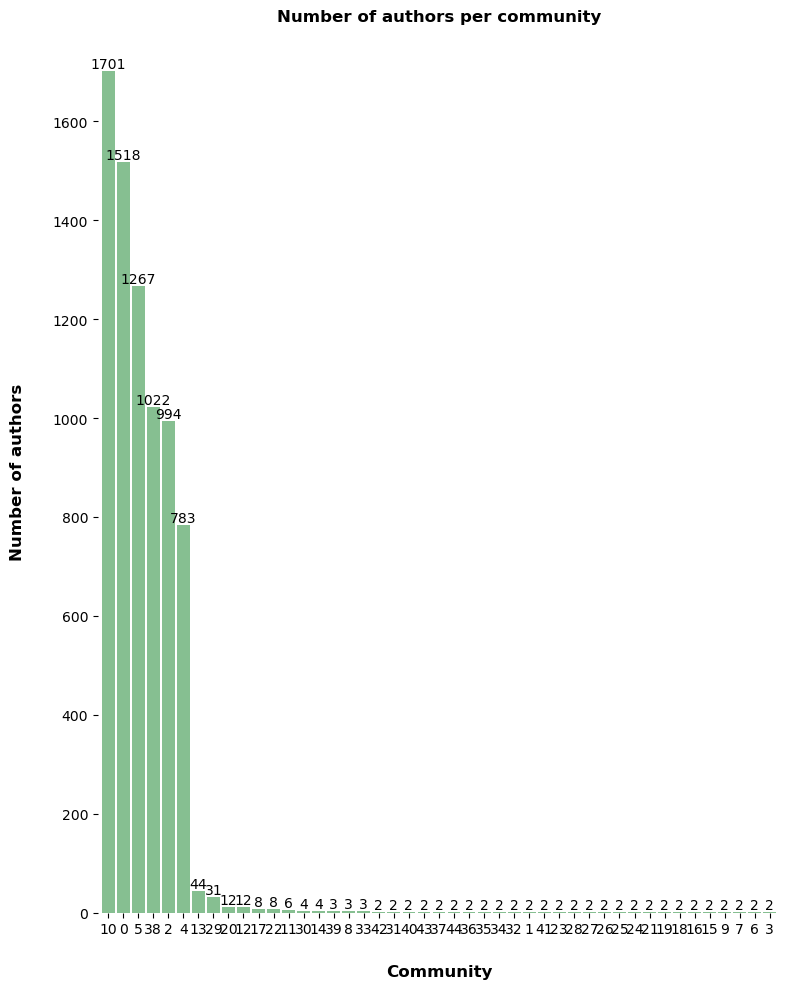

In [20]:
import matplotlib.pyplot as plt

x = communities_df['Community'].value_counts()

ax = x.plot(kind="bar", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels and title
ax.set_xlabel("Community", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Number of authors", labelpad=20, weight='bold', size=12)
ax.set_title("Number of authors per community", size=12, weight='bold')

plt.xticks(rotation=0)
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.tight_layout()  # Adjust layout
ax.legend().set_visible(False)

plt.show()


# What is the most frequent POB per community?

In [21]:
# Find the top 5 most frequent PlaceOfBirth values per community
top_pob_per_community = communities_df.groupby('Community')['POB'].apply(lambda x: x.value_counts().head(5).reset_index(name='Frequency').values.tolist() if not x.empty else [])

# Create DataFrames to display the results
top_pob_per_community_df = pd.DataFrame(top_pob_per_community.tolist(), index=top_pob_per_community.index).fillna('')
top_pob_per_community_df.columns = [f'POB_{i+1}' for i in range(5)]

# Display the results
print("Top 5 Most Frequent PlaceOfBirth per Community:")
print(top_pob_per_community_df)


Top 5 Most Frequent PlaceOfBirth per Community:
                      POB_1                 POB_2            POB_3  \
Community                                                            
0          [Amsterdam, 132]       [Rotterdam, 51]   [Den Haag, 45]   
1                                                                    
2           [Amsterdam, 96]        [Den Haag, 48]  [Rotterdam, 31]   
3           [Maastricht, 1]         [Portugal, 1]                    
4           [Amsterdam, 40]       [Rotterdam, 22]   [Den Haag, 12]   
5           [Amsterdam, 45]        [Den Haag, 23]  [Rotterdam, 19]   
6           [Leeuwarden, 1]                                          
7            [Amsterdam, 1]                                          
8               [Brugge, 1]                                          
9                                                                    
10         [Amsterdam, 100]       [Rotterdam, 42]   [Den Haag, 38]   
11                                        

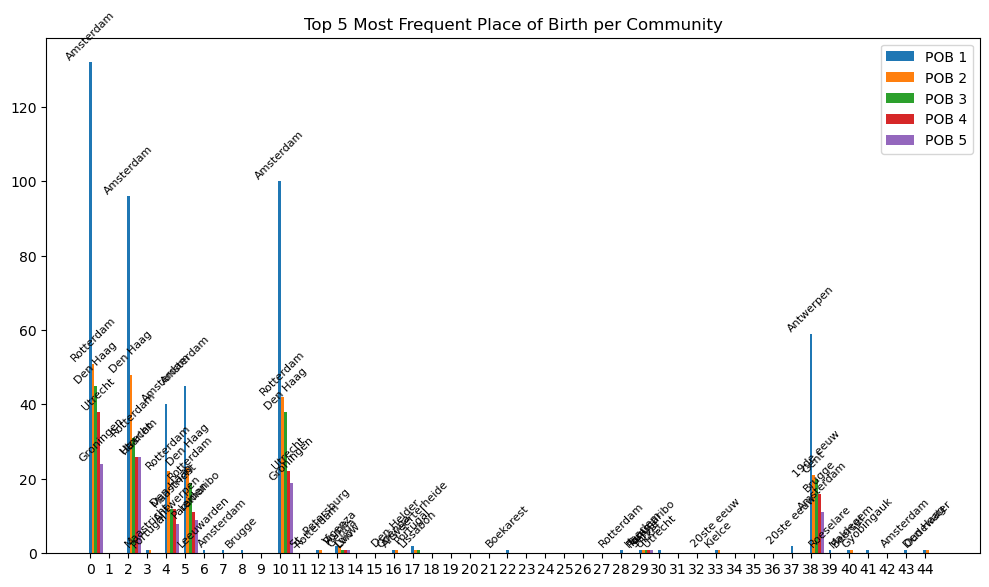

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Find the top 5 most frequent PlaceOfBirth values per community
top_pob_per_community = communities_df.groupby('Community')['POB'].apply(lambda x: x.value_counts().head(5).reset_index(name='Frequency').values.tolist() if not x.empty else [])

# Create a DataFrame to display the results
top_pob_per_community_df = pd.DataFrame(top_pob_per_community.tolist(), index=top_pob_per_community.index).fillna('')
top_pob_per_community_df.columns = [f'POB {i+1}' for i in range(5)]

# Plotting the bar plot for Place of Birth
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.bar(np.arange(len(top_pob_per_community_df.index)) + i * 0.15, top_pob_per_community_df[f'POB {i+1}'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else 0), width=0.15, label=f'POB {i+1}')

plt.title('Top 5 Most Frequent Place of Birth per Community')
plt.xticks(np.arange(len(top_pob_per_community_df.index)), top_pob_per_community_df.index)
plt.legend()

# Add labels to the bars
for i, community in enumerate(top_pob_per_community_df.index):
    for j in range(5):
        label = top_pob_per_community_df.at[community, f'POB {j+1}']
        if isinstance(label, list) and len(label) > 1:
            plt.text(i + j * 0.15, label[1] + 0.05, label[0], ha='center', va='bottom', rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


# What is the most frequent POD per community?

In [23]:
# Find the top 5 most frequent PlaceOfDeath values per community
top_pod_per_community = communities_df.groupby('Community')['POD'].apply(lambda x: x.value_counts().head(5).reset_index(name='Frequency').values.tolist() if not x.empty else [])

# Create DataFrames to display the results
top_pod_per_community_df = pd.DataFrame(top_pod_per_community.tolist(), index=top_pod_per_community.index).fillna('')
top_pod_per_community_df.columns = [f'POD_{i+1}' for i in range(5)]

# Display the results
print("\nTop 5 Most Frequent PlaceOfDeath per Community:")
print(top_pod_per_community_df)


Top 5 Most Frequent PlaceOfDeath per Community:
                             POD_1             POD_2            POD_3  \
Community                                                               
0                  [Den Haag, 109]  [Amsterdam, 101]     [Leiden, 47]   
1                                                                       
2                  [Den Haag, 102]   [Amsterdam, 59]     [Leiden, 41]   
3                                                                       
4                  [Amsterdam, 23]      [Leiden, 16]   [Den Haag, 14]   
5                  [Amsterdam, 37]      [Leiden, 13]   [Den Haag, 10]   
6                       [Breda, 1]                                      
7                     [Utrecht, 1]                                      
8          [Sint-Pieters-Jette, 1]                                      
9                                                                       
10                [Amsterdam, 100]    [Den Haag, 33]  [Rotterdam, 11]   
11

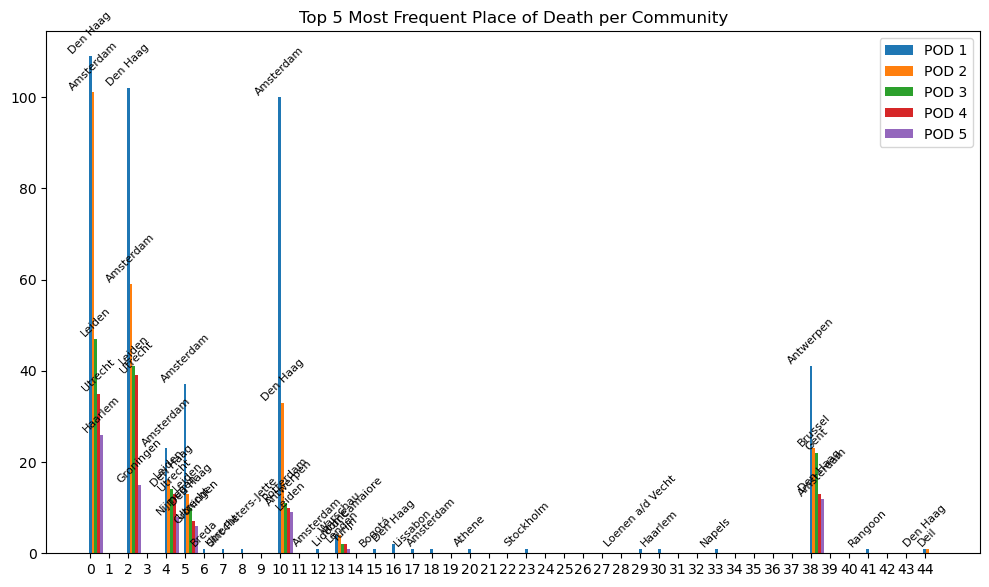

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Find the top 5 most frequent PlaceOfDeath values per community
top_pod_per_community = communities_df.groupby('Community')['POD'].apply(lambda x: x.value_counts().head(5).reset_index(name='Frequency').values.tolist() if not x.empty else [])

# Create a DataFrame to display the results
top_pod_per_community_df = pd.DataFrame(top_pod_per_community.tolist(), index=top_pod_per_community.index).fillna('')
top_pod_per_community_df.columns = [f'POD {i+1}' for i in range(5)]

# Plotting the bar plot for Place of Death
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.bar(np.arange(len(top_pod_per_community_df.index)) + i * 0.15, top_pod_per_community_df[f'POD {i+1}'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else 0), width=0.15, label=f'POD {i+1}')

plt.title('Top 5 Most Frequent Place of Death per Community')
plt.xticks(np.arange(len(top_pod_per_community_df.index)), top_pod_per_community_df.index)
plt.legend()

# Add labels to the bars
for i, community in enumerate(top_pod_per_community_df.index):
    for j in range(5):
        label = top_pod_per_community_df.at[community, f'POD {j+1}']
        if isinstance(label, list) and len(label) > 1:
            plt.text(i + j * 0.15, label[1] + 0.05, label[0], ha='center', va='bottom', rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


# Which authors are the most important (according to centrality measures)?

In [25]:
centrality_df = pd.read_csv("CCLAMP_Network_Centralities.txt", sep="\t", encoding='utf-8')
centrality_df.head(10)

,Author,Harmonic,Closeness,Degree,Betweenness,In-degree,Out-degree,Eigenvector
0,Elisabeth Augustin,1971.128571,0.246153,0.004414,4.326378e-05,0.001873,0.002541,4.047689e-03
1,Frank Ligtvoet,1799.169048,0.222343,0.006688,4.116129e-05,0.003478,0.003210,3.256413e-03
2,Mario Gommeren,1396.711111,0.176384,0.000669,3.153200e-08,0.000134,0.000535,1.231055e-04
3,Willem Bijsterbosch,1590.119048,0.202468,0.000401,0.000000e+00,0.000401,0.000000,2.754394e-04
4,Pierre-Henri Simon,1338.673413,0.172600,0.000268,1.127559e-04,0.000134,0.000134,2.377946e-05
5,F. Collin,0.000000,0.000000,0.000134,0.000000e+00,0.000000,0.000134,3.552026e-97
6,G.A.J. Hazeu,1788.859524,0.226192,0.002541,5.190570e-06,0.001739,0.000803,1.222224e-03
7,R. de Josselin de Jong,2123.488095,0.266325,0.003879,4.927031e-05,0.003344,0.000535,1.062600e-02
8,B.H. Kazemier,1580.168651,0.201666,0.000268,0.000000e+00,0.000134,0.000134,2.046270e-04
9,Clarissa Jacobi,1820.133333,0.233108,0.000535,0.000000e+00,0.000535,0.000000,1.067012e-03


In [26]:
merged_df = pd.merge(communities_df, centrality_df, on='Author', how='left')
merged_df.to_csv("CCLAMP_Network_Communities_Centrality.txt", index=True, sep='\t', encoding='utf-8')
merged_df.head(10)

,Unnamed: 0,Author,Community,DOB,DOD,POB,POD,Harmonic,Closeness,Degree,Betweenness,In-degree,Out-degree,Eigenvector
0,0,Albert Helman,0,7 november 1903,10 juli 1996,Paramaribo,Amsterdam,2530.069048,0.307316,0.039593,0.002856,0.027020,0.012574,0.050024
1,1,Hendrik Andriessen,0,17 september 1892,12 april 1981,Haarlem,Haarlem,2112.869048,0.260140,0.008828,0.000422,0.006956,0.001873,0.011359
2,2,Henk Kuitenbrouwer,0,20 november 1903,3 augustus 1974,Utrecht,Utrecht,2116.452381,0.261323,0.030498,0.001064,0.005886,0.024612,0.015769
3,3,Henri Bruning,0,10 juli 1900,17 januari 1983,Amsterdam,Nijmegen,2421.095238,0.297748,0.013109,0.000000,0.013109,0.000000,0.032193
4,4,Jan Bruna,0,17 augustus 1876,11 maart 1931,NaN,NaN,1975.728571,0.247870,0.008159,0.000123,0.001873,0.006287,0.007280
5,5,Joep Nicolas,38,6 oktober 1897,25 juli 1972,NaN,Steyl,2132.319048,0.261310,0.009497,0.000656,0.008026,0.001471,0.024807
6,6,Albert Kuyle,0,17 februari 1904,4 maart 1958,Utrecht,Utrecht,2364.728571,0.286814,0.038523,0.001377,0.019663,0.018860,0.040630
7,7,Albe,2,8 juni 1902,10 oktober 1973,Mechelen,Brussel,4004.716667,0.452943,0.300696,0.060445,0.297485,0.003210,0.284444
8,8,Jan Engelman,0,7 juni 1900,20 maart 1972,Utrecht,Amsterdam,2613.111905,0.317101,0.064874,0.009542,0.031300,0.033574,0.067639
9,9,Carel Scharten,0,14 maart 1878,30 oktober 1950,Middelburg,Florence,2464.935714,0.303819,0.038390,0.003423,0.014312,0.024077,0.041210


In [27]:
# Display top 100 authors sorted by Harmonic centrality
top_100_authors = merged_df.nlargest(100, 'Harmonic')

top_100_authors.head(20)

,Unnamed: 0,Author,Community,DOB,DOD,POB,POD,Harmonic,Closeness,Degree,Betweenness,In-degree,Out-degree,Eigenvector
7,7,Albe,2,8 juni 1902,10 oktober 1973,Mechelen,Brussel,4004.716667,0.452943,0.300696,0.060445,0.297485,0.003210,0.284444
33,33,Multatuli,0,2 maart 1820,19 februari 1887,Amsterdam,Nieder-Ingelheim,3233.202381,0.375051,0.133494,0.013521,0.132156,0.001338,0.165608
330,330,Martinus Nijhoff,0,20 april 1894,26 januari 1953,Den Haag,Den Haag,3143.335714,0.364776,0.144329,0.033983,0.118914,0.025415,0.136109
127,127,Guido Gezelle,38,1 mei 1830,27 november 1899,Brugge,Brugge,2883.135714,0.339832,0.077849,0.001979,0.077047,0.000803,0.136622
34,34,Albert Verwey,0,15 mei 1865,8 maart 1937,Amsterdam,Noordwijk,2832.685714,0.336064,0.070894,0.003619,0.065811,0.005083,0.109928
61,61,A. Roland Holst,10,23 mei 1888,6 augustus 1976,Amsterdam,Bergen,2810.835714,0.334833,0.073970,0.007870,0.060861,0.013109,0.111440
427,427,Thomas Mann,10,6 juni 1875,12 augustus 1955,Lübeck,Zürich,2749.669048,0.329342,0.053371,0.001044,0.053237,0.000134,0.070986
69,69,Marnix Gijsen,38,20 oktober 1899,29 september 1984,Antwerpen,Leuven,2749.335714,0.327790,0.086811,0.009279,0.056447,0.030364,0.113986
37,37,Herman Gorter,0,26 november 1864,15 september 1927,Wormerveer,"St-Joost-Ten-Noode, Brussel",2742.185714,0.327964,0.051632,0.001945,0.051097,0.000535,0.092512
51,51,Willem Kloos,0,6 mei 1859,31 maart 1938,Amsterdam,Den Haag,2741.969048,0.329474,0.056314,0.005775,0.048422,0.007892,0.097182


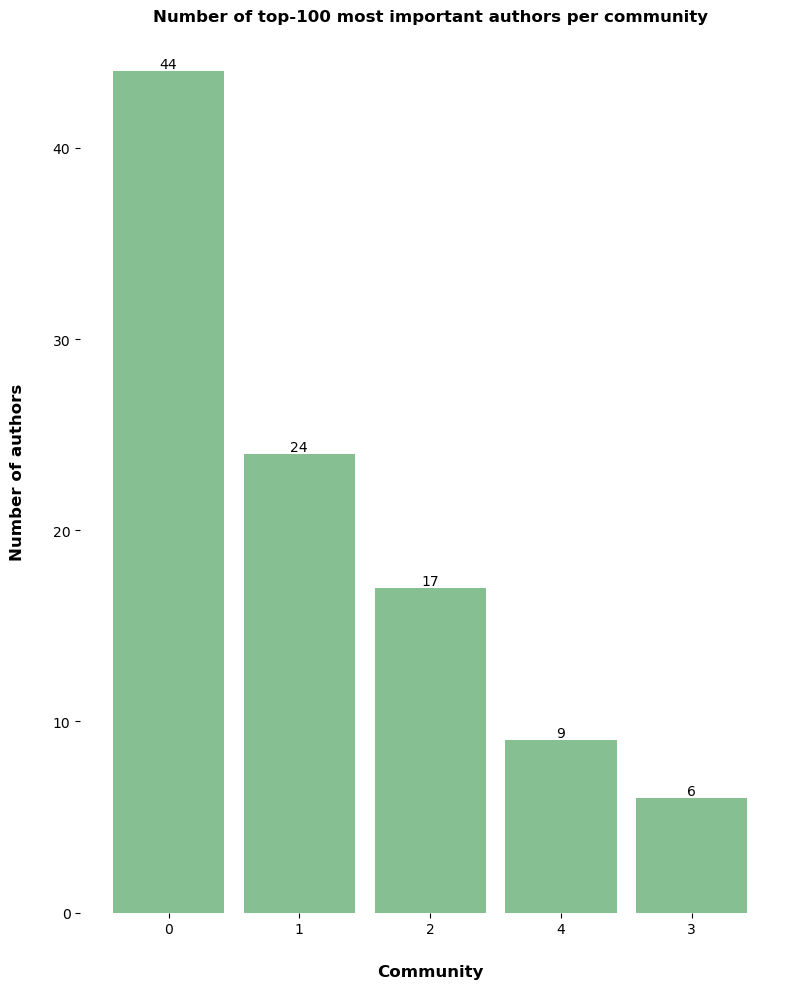

In [26]:
#To which communities do these 100 authors belong?
import matplotlib.pyplot as plt

# Assuming your DataFrame is named communities_df
x= top_100_authors['Community'].value_counts()

ax = x.plot(kind="bar", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels and title
ax.set_xlabel("Community", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Number of authors", labelpad=20, weight='bold', size=12)
ax.set_title("Number of top-100 most important authors per community", size=12, weight='bold')

plt.xticks(rotation=0)
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.tight_layout()  # Adjust layout
ax.legend().set_visible(False)

plt.show()

In [27]:
# Top 5 authors for each community, again sorted by Harmonic centrality
top_5_authors_per_community = (
    merged_df.groupby('Community', group_keys=False)
    .apply(lambda group: group.nlargest(5, 'Harmonic'))
)

# Displaying relevant columns and formatting the output
columns_to_display = ['Author', 'Community', 'Harmonic']
top_5_authors_per_community_display = top_5_authors_per_community[columns_to_display]

# Use to_string() for a neat display
print(top_5_authors_per_community_display.to_string(index=False))


                       Author  Community    Harmonic
                Guido Gezelle          0 2928.569048
                Marnix Gijsen          0 2795.519048
                Marnix Gijsen          0 2795.519048
                 Willem Kloos          0 2789.769048
         Anton van Duinkerken          0 2786.195238
              A. Roland Holst          1 2857.435714
                  Thomas Mann          1 2796.169048
              Menno ter Braak          1 2733.811905
                     Lucebert          1 2706.376190
         Lodewijk van Deyssel          1 2701.885714
                         Albe          2 4063.516667
                    Multatuli          2 3282.969048
             Martinus Nijhoff          2 3195.102381
             Martinus Nijhoff          2 3195.102381
             Martinus Nijhoff          2 3195.102381
                Albert Verwey          3 2879.785714
                      M. Stol          3 2680.895238
                 A.A.M. Stols          3 2672.

# Visualize communities

In [67]:
# set communities as a node attribute
nx.set_node_attributes(G, communities, 'group')

# draw graph with communities
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("CCLAMP_communities.html")

CCLAMP_communities.html
